In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# ACT1 OUTLIERS

## 1.Limpieza y exploración inicial

In [305]:
df1=pd.read_csv("Outliers_datos.csv")
df1_raw=df1.copy()
df1_raw.shape

(200000, 6)

In [306]:
df1.head()

,tienda_id,clientes_mes,ticket_promedio,ventas_mensuales,empleados,metros_cuadrados
0,1,1485.0,29.48,45256.41,9.0,152
1,2,837.0,23.67,20326.15,6.0,136
2,3,670.0,21.82,14985.37,5.0,156
3,4,1147.0,22.92,26040.98,6.0,178
4,5,840.0,28.32,24192.05,6.0,134


In [307]:
df1_raw.info()
df1_raw.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tienda_id         200000 non-null  int64  
 1   clientes_mes      199900 non-null  float64
 2   ticket_promedio   199889 non-null  float64
 3   ventas_mensuales  199816 non-null  float64
 4   empleados         199897 non-null  float64
 5   metros_cuadrados  200000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 9.2 MB


tienda_id             int64
clientes_mes        float64
ticket_promedio     float64
ventas_mensuales    float64
empleados           float64
metros_cuadrados      int64
dtype: object

In [308]:
df1_raw.describe()

,tienda_id,clientes_mes,ticket_promedio,ventas_mensuales,empleados,metros_cuadrados
count,200000.000000,199900.000000,199889.000000,199816.000000,199897.000000,200000.000000
mean,100000.500000,891.934132,24.007728,21439.432915,6.481378,139.650340
std,57735.171256,234.277728,2.998576,6689.569952,1.993823,25.798547
min,1.000000,20.000000,11.040000,418.850000,1.000000,20.000000
25%,50000.750000,739.000000,21.980000,17098.657500,5.000000,123.000000
50%,100000.500000,891.000000,24.010000,21064.980000,6.000000,140.000000
75%,150000.250000,1043.000000,26.030000,25351.690000,8.000000,156.000000
max,200000.000000,6420.000000,37.580000,323088.480000,33.000000,585.000000


In [309]:
df1_raw['tienda_id'].nunique() == len(df1_raw)
df1_raw = df1_raw[
    (df1_raw['clientes_mes'] > 0) &
    (df1_raw['ticket_promedio'] > 0) &
    (df1_raw['ventas_mensuales'] >= 0) &
    (df1_raw['empleados'] > 0) &
    (df1_raw['metros_cuadrados'] > 0)
]

In [310]:
df1_raw.isna().sum()

tienda_id           0
clientes_mes        0
ticket_promedio     0
ventas_mensuales    0
empleados           0
metros_cuadrados    0
dtype: int64

In [311]:
df1_raw.isna().sum()/len(df1_raw)

tienda_id           0.0
clientes_mes        0.0
ticket_promedio     0.0
ventas_mensuales    0.0
empleados           0.0
metros_cuadrados    0.0
dtype: float64

In [312]:
y=df1_raw['ventas_mensuales']
x=df1_raw.drop(columns=['ventas_mensuales','tienda_id'])

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42 )

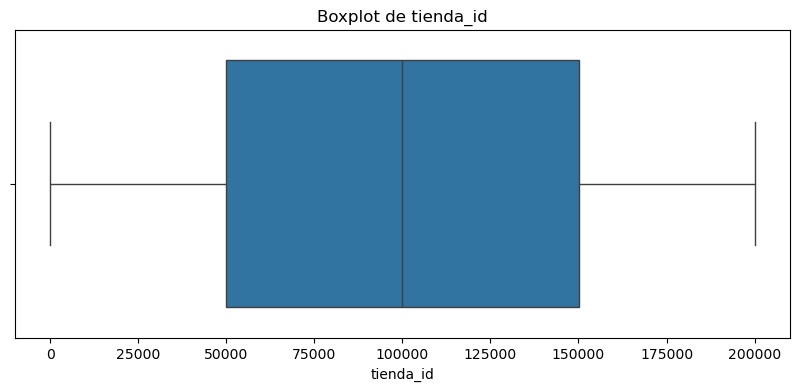

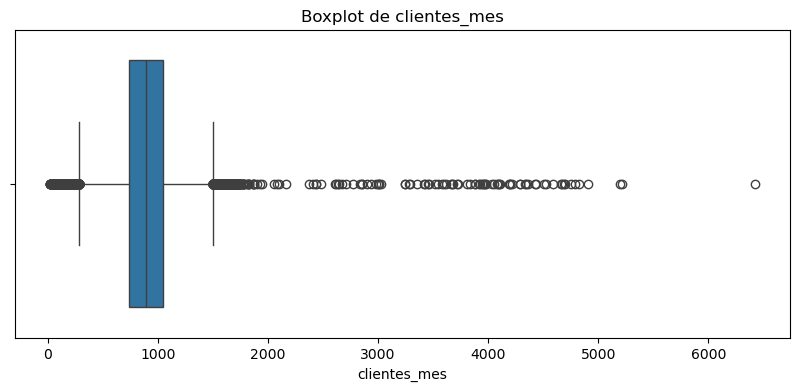

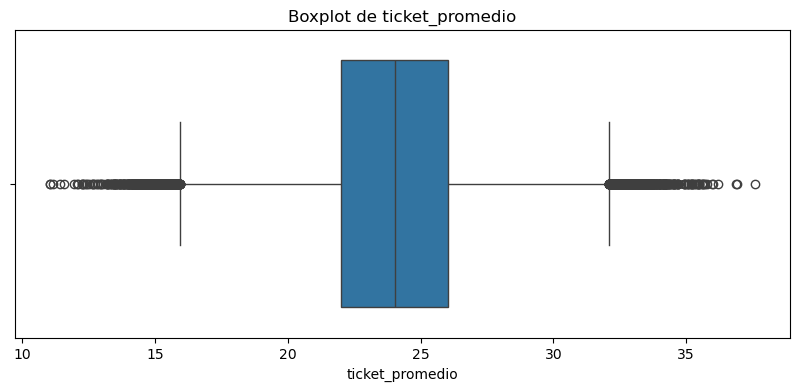

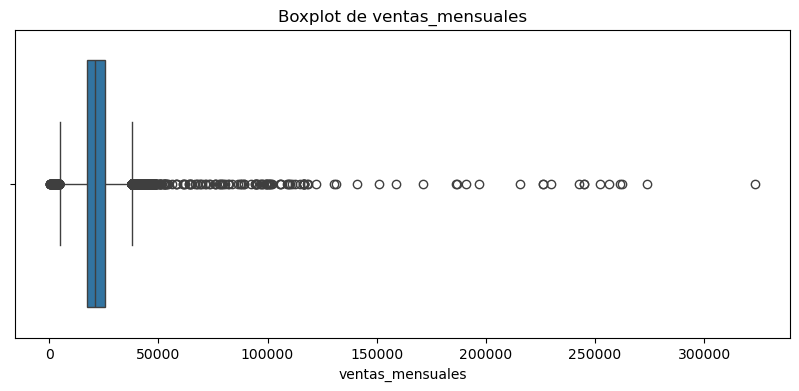

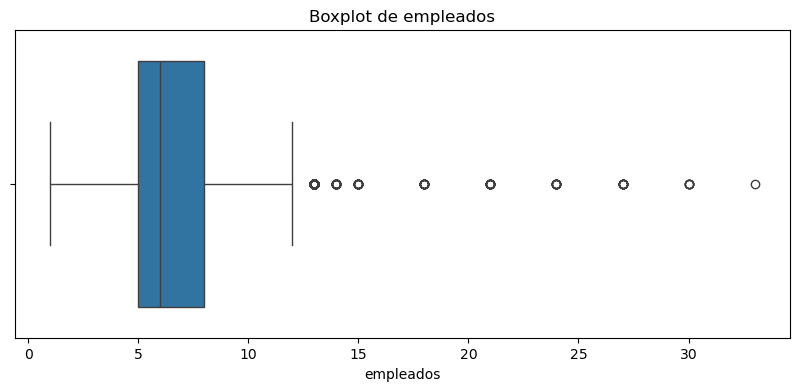

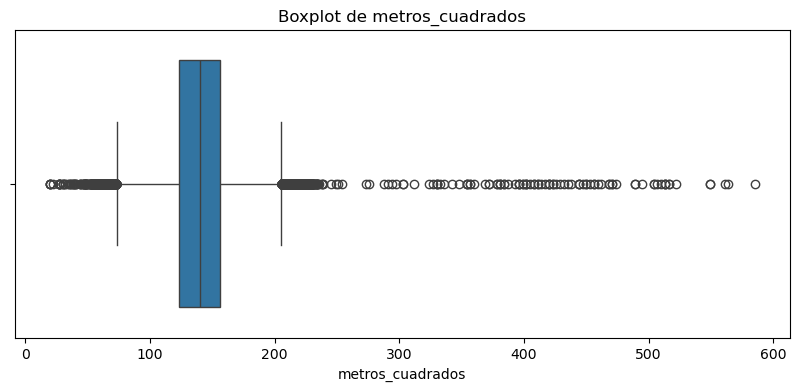

In [313]:
for column in df1_raw.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_raw[column])
    plt.title(f"Boxplot de {column}", fontsize=12)
    plt.xlabel(column)
    plt.show()

In [314]:
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(round(IQR, 2))
print(round(lower,2))
print(round(upper,2))

outliers = y_train[
    (y_train < lower) |
    (y_train > upper)
]

print("Cantidad de outliers:", len(outliers))


8250.67
4715.82
37718.49
Cantidad de outliers: 1568


In [315]:
# cálculo vectorizado del z-score
z_scores = (y_train - y_train.mean()) / y_train.std()
print('Outliers por z-score',len(z_scores>3))

Outliers por z-score 159602


In [316]:

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(x_train)
outliers = iso_forest.predict(x_train) 
es_outlier=outliers==-1

print(f"Número de outliers detectados: {sum(es_outlier)}")

x_train_clean = x_train[~es_outlier]
y_train_clean = y_train[~es_outlier]

print(f"Registros antes: {len(x_train)}")
print(f"Registros después: {len(x_train_clean)}")

""" for col in x_train_clean.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_raw[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """

Número de outliers detectados: 7981
Registros antes: 159602
Registros después: 151621


' for col in x_train_clean.columns:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_raw[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

In [317]:
x_train_clean = x_train[(y_train >= lower) & (y_train <= upper)].copy()
y_train_clean = y_train[(y_train >= lower) & (y_train <= upper)].copy()

print('Antes (entrenamiento):', len(x_train))
print('Después (entrenamiento):', len(x_train_clean))

""" for col in x_train_clean.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_raw[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """

Antes (entrenamiento): 159602
Después (entrenamiento): 158034


' for col in x_train_clean.columns:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_raw[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

### Mi versión del ejercicio sin train y test

### IQR

In [318]:
num_cols=df1_raw.select_dtypes('number').columns

Q1= df1_raw[num_cols].quantile(0.25)
Q3=df1_raw[num_cols].quantile(0.75)
IQR=Q3-Q1
print(IQR)

upper= Q3+1.5*IQR
lower= Q1-1.5*IQR

df1_clean = df1_raw[((df1_raw[num_cols] >= lower) & (df1_raw[num_cols] <= upper)).all(axis=1)]
print(f"Registros originales: {len(df1_raw)}")
print(f"Registros tras limpiar todos los outliers: {len(df1_clean)}")

""" for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_clean[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """

tienda_id           100031.000
clientes_mes           303.000
ticket_promedio          4.040
ventas_mensuales      8251.455
empleados                3.000
metros_cuadrados        33.000
dtype: float64
Registros originales: 199503
Registros tras limpiar todos los outliers: 194057


' for col in num_cols:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_clean[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

### Z-SCORE

In [319]:
media=df1_raw[num_cols].mean()
std=df1_raw[num_cols].std()
print(media)
print(std)

ZSCORE=(df1_raw[num_cols]-media)/std
#print(ZSCORE)

print('outliers:', ZSCORE[(ZSCORE>3) | (ZSCORE<-3)].count())

filas_outliers = (ZSCORE.abs() > 3).any(axis=1)

df1_clean=df1_raw[~filas_outliers].copy()
print(f'filas antes: {len(df1_raw)}')
print(f'filas después: {len(df1_clean)}')

""" for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_clean[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """



tienda_id           99992.381172
clientes_mes          892.380821
ticket_promedio        24.009313
ventas_mensuales    21440.002838
empleados               6.483692
metros_cuadrados      139.687208
dtype: float64
tienda_id           57742.844609
clientes_mes          233.663192
ticket_promedio         2.998083
ventas_mensuales     6686.124252
empleados               1.992440
metros_cuadrados       25.746453
dtype: float64
outliers: tienda_id             0
clientes_mes        470
ticket_promedio     536
ventas_mensuales    530
empleados           288
metros_cuadrados    490
dtype: int64
filas antes: 199503
filas después: 197683


' for col in num_cols:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_clean[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

In [320]:
iso_forest=IsolationForest(contamination=0.1, random_state=42)
preds=iso_forest.fit_predict(df1_raw[num_cols])

mask_normales=(preds==1)
df1_clean=df1_raw[mask_normales].copy()
print(f'filas antes: {len(df1_raw)}')
print(f'filas después: {len(df1_clean)}')

""" for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_clean[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """


filas antes: 199503
filas después: 179552


' for col in num_cols:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_clean[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

df1_IQR=df1_copy()

# ACT2 CONVERSIÓN DE TIPOS

## Importado

In [321]:
df2=pd.read_csv('social_services_incidents_raw.csv')
df2_raw=df2.copy()
df2_raw.shape

(200000, 10)

In [322]:
df2_raw.head()

,incident_id,incident_datetime,city,service_type,risk_level,people_affected,response_time_minutes,cost_estimated,incident_description,reported_by
0,1,2019-01-01 00:00:00,Leeds,Housing Support,Low,2.0,unknown,481.59,Routine social support follow-up,NGO
1,2,2019-01-01 00:15:46.516732583,Bristol,Mental Health,Low,1.0,79.97,342.83,Low risk assistance request,School
2,3,2019-01-01,LONDON,Social Services,Medium,6.0,34.55,1784.11,Ongoing support intervention,School
3,4,2019-01-01 00:47:19.550197750,Manchester,Emergency,low,2.0,65.86,522.94,Low risk assistance request,School
4,5,2019-01-01 01:03:06.066930334,Manchester,Housing Support,Low,2.0,68.44,865.27 €,NaN,Citizen


In [323]:
df2_raw.info()
df2_raw.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   incident_id            200000 non-null  int64  
 1   incident_datetime      200000 non-null  object 
 2   city                   200000 non-null  object 
 3   service_type           200000 non-null  object 
 4   risk_level             200000 non-null  object 
 5   people_affected        183757 non-null  float64
 6   response_time_minutes  200000 non-null  object 
 7   cost_estimated         200000 non-null  object 
 8   incident_description   180131 non-null  object 
 9   reported_by            200000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 15.3+ MB


incident_id                int64
incident_datetime         object
city                      object
service_type              object
risk_level                object
people_affected          float64
response_time_minutes     object
cost_estimated            object
incident_description      object
reported_by               object
dtype: object

In [324]:
df2_raw.describe()

,incident_id,people_affected
count,200000.000000,183757.000000
mean,100000.500000,4.809346
std,57735.171256,3.546969
min,1.000000,1.000000
25%,50000.750000,2.000000
50%,100000.500000,3.000000
75%,150000.250000,7.000000
max,200000.000000,14.000000


## Limpieza de datos

In [325]:
cat_cols=df2_raw.select_dtypes(include="O").columns
num_cols=df2_raw.select_dtypes(include="number").columns

In [326]:
#df2_raw[cat_cols] = df2_raw[cat_cols].astype(str).str.strip().str.title()

for col in cat_cols:
    df2_raw[col] = df2_raw[col].astype(str).str.strip().str.title()
print(df2_raw.head())

   incident_id              incident_datetime        city     service_type  \
0            1            2019-01-01 00:00:00       Leeds  Housing Support   
1            2  2019-01-01 00:15:46.516732583     Bristol    Mental Health   
2            3                     2019-01-01      London  Social Services   
3            4  2019-01-01 00:47:19.550197750  Manchester        Emergency   
4            5  2019-01-01 01:03:06.066930334  Manchester  Housing Support   

  risk_level  people_affected response_time_minutes cost_estimated  \
0        Low              2.0               Unknown         481.59   
1        Low              1.0                 79.97         342.83   
2     Medium              6.0                 34.55        1784.11   
3        Low              2.0                 65.86         522.94   
4        Low              2.0                 68.44       865.27 €   

               incident_description reported_by  
0  Routine Social Support Follow-Up         Ngo  
1       Lo

In [327]:

df2_raw['risk_level']=df2_raw['risk_level'].astype(str).str.strip().str.upper()
df2_raw['risk_level'].head(10)

0       LOW
1       LOW
2    MEDIUM
3       LOW
4       LOW
5       LOW
6    MEDIUM
7       LOW
8      HIGH
9      HIGH
Name: risk_level, dtype: object

In [328]:
df2_raw['people_affected']=pd.to_numeric(df2_raw['people_affected'], errors='coerce' )
df2_raw = df2_raw.dropna(subset=['people_affected']).reset_index()
df2_raw['people_affected']=df2_raw['people_affected'].astype(int)
df2_raw['people_affected'].head(10)

0     2
1     1
2     6
3     2
4     2
5     3
6     2
7     6
8     6
9    13
Name: people_affected, dtype: int64

In [329]:

df2_raw['response_time_minutes'] = pd.to_numeric(df2_raw['response_time_minutes'], errors='coerce')
df2_raw = df2_raw.dropna(subset=['response_time_minutes'])
df2_raw = df2_raw[df2_raw['response_time_minutes'] >= 0]
print(df2_raw[['response_time_minutes']].head())

   response_time_minutes
1                  79.97
2                  34.55
3                  65.86
4                  68.44
5                  68.93


In [330]:
df2_raw['cost_estimated'] = (df2_raw['cost_estimated'].astype(str)
                        .str.replace('€', '', regex=False)
                        .str.replace(',', '', regex=False)
                        .str.strip())
df2_raw['cost_estimated'] = pd.to_numeric(df2_raw['cost_estimated'], errors='coerce')
print(df2_raw[['cost_estimated']].head())

   cost_estimated
1          342.83
2         1784.11
3          522.94
4          865.27
5         1953.11


In [331]:
df2_raw['service_type'] = df2_raw['service_type'].astype(str).str.strip().str.title()
print(df2_raw[['service_type']].head())

      service_type
1    Mental Health
2  Social Services
3        Emergency
4  Housing Support
5        Emergency


In [332]:
df2_raw['reported_by'] = df2_raw['reported_by'].astype(str).str.strip().str.title()
print(df2_raw[['reported_by']].head())

  reported_by
1      School
2      School
3      School
4     Citizen
5      School


In [333]:

df2_raw['incident_datetime'] = df2_raw['incident_datetime'].astype(str)


es_fecha_larga = df2_raw['incident_datetime'].str.contains(r'\.\d+', regex=True)


df2_raw['incident_datetime_clean'] = pd.NaT


df2_raw.loc[es_fecha_larga, 'incident_datetime_clean'] = pd.to_datetime(
    df2_raw.loc[es_fecha_larga, 'incident_datetime'].str.slice(0, 19),
    errors='coerce'
)


df2_raw['incident_datetime'] = df2_raw['incident_datetime_clean']
df2_raw.drop(columns=['incident_datetime_clean'], inplace=True)


print(df2_raw['incident_datetime'].head())

1   2019-01-01 00:15:46
2                   NaT
3   2019-01-01 00:47:19
4   2019-01-01 01:03:06
5   2019-01-01 01:18:52
Name: incident_datetime, dtype: datetime64[ns]


# ACT3 VARIABLES CATEGÓRICAS

## Limpieza

In [334]:
tipos_optimizados = {
    'fuel': 'category',
    'transmission': 'category',
    'drive': 'category',
    'type': 'category',
    'paint_color': 'category',
    'condition': 'category'
}

df = pd.read_csv('vehicles.csv', dtype=tipos_optimizados)
print("✅ Carga optimizada completada.")

✅ Carga optimizada completada.


In [335]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"✅ División completada con éxito:")
print(f"   - Entrenamiento (80%): {X_train.shape[0]} registros")
print(f"   - Prueba (20%): {X_test.shape[0]} registros")

✅ División completada con éxito:
   - Entrenamiento (80%): 80 registros
   - Prueba (20%): 20 registros


In [336]:
null_report = (X_train.isnull().sum() / len(X_train)) * 100
print("--- Porcentaje de nulos por columna ---")
print(null_report[null_report > 0].sort_values(ascending=False))

--- Porcentaje de nulos por columna ---
county    100.0
dtype: float64


In [337]:

cols_descartadas = ['county', 'size', 'VIN', 'url', 'region_url', 'image_url', 'description', 'lat', 'long']
X_train = X_train.drop(columns=cols_descartadas)
X_test= X_test.drop(columns=cols_descartadas)

In [338]:
mediana_km = X_train['odometer'].median()
X_train['odometer'] = X_train['odometer'].fillna(mediana_km)
X_test['odometer'] = X_test['odometer'].fillna(mediana_km)

In [339]:

moda_marca = X_train['manufacturer'].mode()[0]
X_train['manufacturer'] = X_train['manufacturer'].fillna(moda_marca)
X_test['manufacturer'] = X_test['manufacturer'].fillna(moda_marca)

In [340]:

X_train['condition'] = X_train['condition'].cat.add_categories('unknown')
X_test['condition'] = X_test['condition'].cat.add_categories('unknown')

X_train['condition'] = X_train['condition'].fillna('unknown')
X_test['condition'] = X_test['condition'].fillna('unknown')

print("✅ 'unknown' añadido correctamente como categoría en 'condition'.")
print(f"Nulos en condition (Train): {X_train['condition'].isnull().sum()}")

✅ 'unknown' añadido correctamente como categoría en 'condition'.
Nulos en condition (Train): 0


In [341]:


cols_categoricas_faltantes = ['cylinders', 'drive', 'paint_color', 'type', 'fuel', 'transmission', 'title_status', 'model']
cols_numericas_faltantes = ['year'] 
for col in cols_categoricas_faltantes:
    if col in X_train.columns:
        moda = X_train[col].mode()[0]
        X_train[col] = X_train[col].fillna(moda)
        X_test[col] = X_test[col].fillna(moda)

for col in cols_numericas_faltantes:
    if col in X_train.columns:
        mediana = X_train[col].median()
        X_train[col] = X_train[col].fillna(mediana)
        X_test[col] = X_test[col].fillna(mediana)

print("✨ ¡Ahora sí! Todo el bloque central está limpio.")

✨ ¡Ahora sí! Todo el bloque central está limpio.


In [342]:
# Eliminamos posting_date porque no aporta valor predictivo y tiene nulos residuales
if 'posting_date' in X_train.columns:
    X_train = X_train.drop(columns=['posting_date'])
    X_test = X_test.drop(columns=['posting_date'])

print(f"Nulos finales tras borrar metadatos: {X_train.isnull().sum().sum()}")

Nulos finales tras borrar metadatos: 0


## Encoding

### OrdinalEncoder

In [343]:
from sklearn.preprocessing import OrdinalEncoder

In [344]:
orden_logico = [['unknown', 'salvage', 'fair', 'good', 'excellent', 'like new', 'new']]

encoder_ord = OrdinalEncoder(categories=orden_logico)

In [345]:
X_train[['condition']] = encoder_ord.fit_transform(X_train[['condition']])
X_test[['condition']] = encoder_ord.transform(X_test[['condition']])

In [346]:
top_brands = X_train['manufacturer'].value_counts().nlargest(15).index

In [347]:
X_train['manufacturer'] = X_train['manufacturer'].apply(lambda x: x if x in top_brands else 'other')
X_test['manufacturer'] = X_test['manufacturer'].apply(lambda x: x if x in top_brands else 'other')

### one-hot-encoder

In [348]:
cols_to_onehot = ['manufacturer', 'fuel', 'transmission', 'drive', 'type']

X_train = pd.get_dummies(X_train, columns=cols_to_onehot, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cols_to_onehot, drop_first=True)

In [349]:

print(f"🚀 ¡Encoding completado!")
print(f"Dimensiones finales del dataset: {X_train.shape}")
print(f"Ejemplo de columnas nuevas: {list(X_train.columns[:10])}")
print('hecho')

🚀 ¡Encoding completado!
Dimensiones finales del dataset: (80, 37)
Ejemplo de columnas nuevas: ['id', 'region', 'year', 'model', 'condition', 'cylinders', 'odometer', 'title_status', 'paint_color', 'state']
hecho


# ACT4 NORMALIZACION

In [350]:
df = pd.read_csv("datos_hospital")
df = df.sample(n=1000)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 738 to 290
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   edad             1000 non-null   float64
 1   ingreso_anual    1000 non-null   float64
 2   visitas_medicas  1000 non-null   int64  
 3   riesgo_cronico   1000 non-null   float64
 4   gasto_sanitario  1000 non-null   float64
 5   tipo_seguro      1000 non-null   object 
 6   region           1000 non-null   object 
 7   riesgo_mm        1000 non-null   float64
 8   edad_std         1000 non-null   float64
 9   gasto_std        1000 non-null   float64
 10  gasto_robust     1000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 93.8+ KB
None


,edad,ingreso_anual,visitas_medicas,riesgo_cronico,gasto_sanitario,tipo_seguro,region,riesgo_mm,edad_std,gasto_std,gasto_robust
738,70.0,38734.98,1,0.55,2195.20,Mixto,Este,0.55,1.391447,-0.267515,-0.267515
510,25.0,21363.13,1,0.23,589.56,Mixto,Sur,0.23,-1.757098,-1.634759,-1.634759
844,36.0,35859.59,1,0.27,972.23,Mixto,Este,0.27,-0.987454,-1.308906,-1.308906
965,32.0,41404.16,1,0.38,1778.91,Mixto,Este,0.38,-1.267325,-0.621997,-0.621997
879,75.0,41376.73,3,0.85,3750.95,Mixto,Sur,0.85,1.741286,1.057246,1.057246


In [351]:

df.describe()

,edad,ingreso_anual,visitas_medicas,riesgo_cronico,gasto_sanitario,riesgo_mm,edad_std,gasto_std,gasto_robust
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,50.113000,39820.646810,2.431000,0.492550,2637.408240,0.492550,2.131628e-17,0.109036,0.109036
std,14.299465,8775.431505,1.697091,0.169282,1391.910087,0.169282,1.000500e+00,1.185247,1.185247
min,18.000000,15137.020000,0.000000,0.000000,-115.630000,0.000000,-2.246872e+00,-2.235247,-2.235247
25%,40.000000,33936.662500,1.000000,0.380000,1924.517500,0.380000,-7.075831e-01,-0.498008,-0.498008
50%,50.000000,39794.370000,2.000000,0.490000,2509.360000,0.490000,-7.906348e-03,0.000000,0.000000
75%,60.000000,45221.500000,3.000000,0.610000,3098.880000,0.610000,6.917704e-01,0.501992,0.501992
max,95.000000,72331.570000,9.000000,1.000000,16439.590000,1.000000,3.140639e+00,11.861951,11.861951


In [352]:
df.describe(include="object")

,tipo_seguro,region
count,1000,1000
unique,3,4
top,Mixto,Este
freq,718,282


In [353]:
df.isnull().sum()

edad               0
ingreso_anual      0
visitas_medicas    0
riesgo_cronico     0
gasto_sanitario    0
tipo_seguro        0
region             0
riesgo_mm          0
edad_std           0
gasto_std          0
gasto_robust       0
dtype: int64

In [354]:
df.nunique()

edad                71
ingreso_anual      959
visitas_medicas     10
riesgo_cronico      88
gasto_sanitario    971
tipo_seguro          3
region               4
riesgo_mm           88
edad_std            71
gasto_std          971
gasto_robust       971
dtype: int64

In [355]:
df["ingreso_anual"] = df["ingreso_anual"].fillna(df["ingreso_anual"].median())
df["riesgo_cronico"] = df["riesgo_cronico"].fillna(df["riesgo_cronico"].median())
df["gasto_sanitario"] = df["gasto_sanitario"].fillna(df["gasto_sanitario"].median())

df.isnull().sum()

edad               0
ingreso_anual      0
visitas_medicas    0
riesgo_cronico     0
gasto_sanitario    0
tipo_seguro        0
region             0
riesgo_mm          0
edad_std           0
gasto_std          0
gasto_robust       0
dtype: int64

## MinMaxScaler

In [356]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
df['riesgo_mm'] = minmax.fit_transform(df[['riesgo_cronico']])

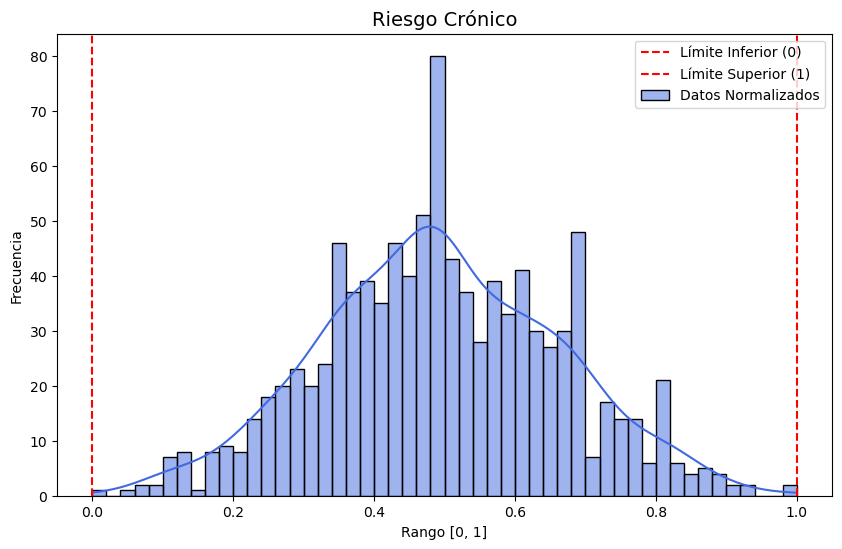

In [357]:
plt.figure(figsize=(10, 6))
sns.histplot(df['riesgo_mm'], kde=True, color='royalblue', bins=50, label='Datos Normalizados')
plt.title('Riesgo Crónico', fontsize=14)
plt.xlabel('Rango [0, 1]')
plt.ylabel('Frecuencia')


plt.axvline(0, color='red', linestyle='--', label='Límite Inferior (0)')
plt.axvline(1, color='red', linestyle='--', label='Límite Superior (1)')

plt.legend(loc='upper right')
plt.show()

## StandardScaler

In [358]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df['edad_std'] = std_scaler.fit_transform(df[['edad']])


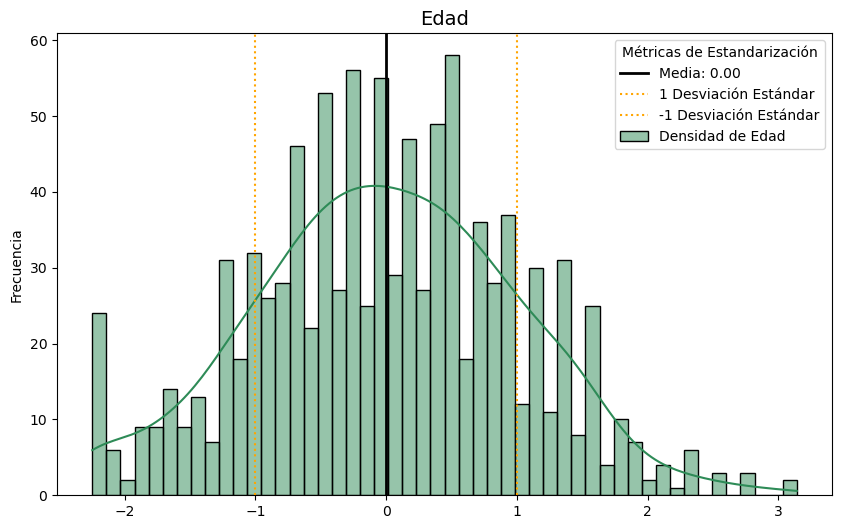

In [359]:
plt.figure(figsize=(10, 6))
sns.histplot(df['edad_std'], kde=True, color='seagreen', bins=50, label='Densidad de Edad')
plt.title('Edad', fontsize=14)
plt.xlabel('')
plt.ylabel('Frecuencia')

# Línea de la media
plt.axvline(df['edad_std'].mean(), color='black', linestyle='-', linewidth=2, label=f'Media: {df["edad_std"].mean():.2f}')
plt.axvline(1, color='orange', linestyle=':', label='1 Desviación Estándar')
plt.axvline(-1, color='orange', linestyle=':', label='-1 Desviación Estándar')

plt.legend(title="Métricas de Estandarización", loc='upper right')
plt.show()

## RobustScaler

In [360]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()
df['gasto_std'] = rb_scaler.fit_transform(df[['gasto_sanitario']])
df['gasto_robust'] = rb_scaler.fit_transform(df[['gasto_sanitario']])

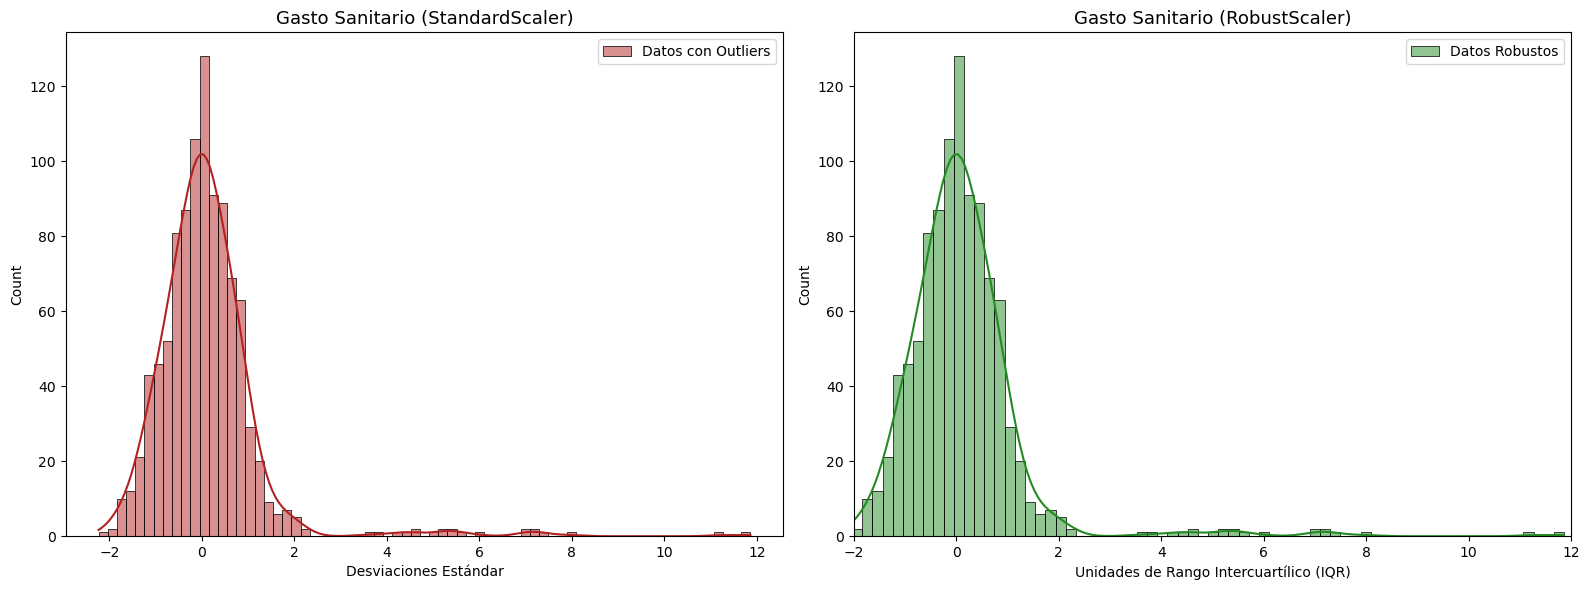

In [361]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#StandardScaler
sns.histplot(df['gasto_std'], kde=True, color='firebrick', ax=ax1, label='Datos con Outliers')
ax1.set_title('Gasto Sanitario (StandardScaler)', fontsize=13)
ax1.set_xlabel('Desviaciones Estándar')
ax1.legend()

#RobustScaler
sns.histplot(df['gasto_robust'], kde=True, color='forestgreen', ax=ax2, label='Datos Robustos')
ax2.set_xlim(-2, 12) 
ax2.set_title('Gasto Sanitario (RobustScaler)', fontsize=13)
ax2.set_xlabel('Unidades de Rango Intercuartílico (IQR)')
ax2.legend()

plt.tight_layout()
plt.show()

# ACT5 PIPELINES Y COLUMNTRANSFORMER

In [362]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [363]:
df_raw= pd.read_csv("Datos.csv")
df_raw.head()

,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,madrid,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,madrid,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,madrid,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,madrid,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,madrid,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,750000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


In [364]:
cols_basura = ['PrecioAnterior', 'descripcion', 'titulo', 'tags', 'Enlace']
df_raw=df_raw.drop(columns=cols_basura)

In [365]:
num_cols=df_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()
#Voy a borrar la columna precio actual para que no de conflicto al entrenar
if 'PrecioActual' in num_cols:
    num_cols.remove('PrecioActual')
cat_cols=df_raw.select_dtypes(include=["object", "category"]).columns.tolist()
print("-Columnas numéricas:",num_cols)
print("-Columnas categóricas:",cat_cols)

-Columnas numéricas: ['metros', 'habitaciones', 'baños']
-Columnas categóricas: ['provincia', 'zona', 'ascensor', 'localizacion', 'planta']


In [366]:
x=df_raw.drop(columns=['PrecioActual'])
y=df_raw['PrecioActual']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)
print("Total de filas:",len(df_raw))
print("-Filas para entrenar:",len(x_train))
print("-Filas para test:",len(x_test))

Total de filas: 11826
-Filas para entrenar: 9460
-Filas para test: 2366


In [367]:
num_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

In [368]:
cat_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [369]:
preprocessor= ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ])

In [370]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [371]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['metros', 'habitaciones',
                                                   'baños']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['provincia', 'zona',
                                                   'ascensor', 'localizacion',
                                                   'planta'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [372]:
print("Score en Test:", pipeline.score(x_test, y_test))

Score en Test: 0.8515919116222558


In [373]:
columnas_finales = pipeline.named_steps['preprocessor'].get_feature_names_out()
print("-Numero de columnas antes de la transformación:",len(df_raw.columns)) 
print("-Número de columnas tras transformación:", len(columnas_finales))

-Numero de columnas antes de la transformación: 9
-Número de columnas tras transformación: 55


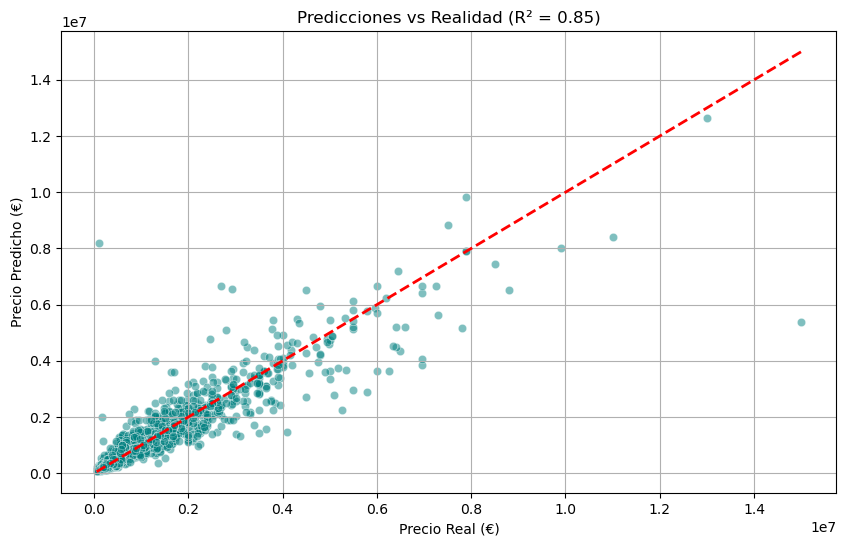

In [374]:
y_pred = pipeline.predict(x_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='teal')

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, linestyle='--')

plt.title(f'Predicciones vs Realidad (R² = {pipeline.score(x_test, y_test):.2f})')
plt.xlabel('Precio Real (€)')
plt.ylabel('Precio Predicho (€)')
plt.grid(True)
plt.show()

## 1. EVALUACION DEL MODELO

### El modelo alcanzó un Score ($R^2$) de 0.8508. Esto significa que el 85% de la variación de los precios de las viviendas se explica correctamente por las variables elegidas (metros, zona, habitaciones, etc.). Es un resultado muy sólido que demuestra que el modelo predice con alta precisión.

## 2. ¿POR QUÉ EL PIPELINE EVITA EL DATA LEAKAGE?

### El uso del Pipeline garantiza que el modelo sea "ciego" a los datos de prueba durante su entrenamiento:

### Sin Pipeline: Si calculas la media o la mediana de todo el dataset antes de dividir, el entrenamiento "sabe" información del futuro (del test), lo que falsea los resultados.

### Con Pipeline: Las estadísticas (como la mediana para rellenar nulos o la escala de los números) se calculan solo con los datos de entrenamiento. Luego, esos mismos valores se aplican al test.

### Conclusión: Esto asegura que la métrica de 0.85 sea real y honesta, simulando perfectamente cómo funcionaría el modelo con datos nuevos que lleguen en el futuro.

# RECONVERSIÓN DEL DATAFRAME LIMPIO(OPCIONAL)

In [375]:
datos_limpios_array = pipeline.named_steps['preprocessor'].transform(x_test)
columnas_nombres = pipeline.named_steps['preprocessor'].get_feature_names_out()

df_limpio = pd.DataFrame(datos_limpios_array, columns=columnas_nombres)

In [376]:
df_limpio.to_csv('Datos_Limpios_Pipeline.csv', index=False)

In [377]:
print(df_limpio.isna().sum()/len(df_limpio))

num__metros                      0.0
num__habitaciones                0.0
num__baños                       0.0
cat__provincia_madrid            0.0
cat__zona_arganzuela             0.0
cat__zona_barajas                0.0
cat__zona_barrio-de-salamanca    0.0
cat__zona_carabanchel            0.0
cat__zona_centro                 0.0
cat__zona_chamartin              0.0
cat__zona_chamberi               0.0
cat__zona_ciudad-lineal          0.0
cat__zona_fuencarral             0.0
cat__zona_hortaleza              0.0
cat__zona_latina                 0.0
cat__zona_moncloa                0.0
cat__zona_moratalaz              0.0
cat__zona_puente-de-vallecas     0.0
cat__zona_retiro                 0.0
cat__zona_san-blas               0.0
cat__zona_tetuan                 0.0
cat__zona_usera                  0.0
cat__zona_vicalvaro              0.0
cat__zona_villa-de-vallecas      0.0
cat__zona_villaverde             0.0
cat__ascensor_N                  0.0
cat__ascensor_S                  0.0
c

In [378]:
#VOLVEMOS A CARGAR POR LAS COLUMNAS ANTERIORMENTE ELIMINADAS
df_aux = pd.read_csv("Datos.csv")

#PREPROCESAMOS X PARA RELLENARLO 
datos_completos_array = preprocessor.transform(x)
encoded_feature_names = preprocessor.get_feature_names_out()
df_temp_full = pd.DataFrame(datos_completos_array, columns=encoded_feature_names)

#SEPARAR COLUMNAS NUMÉRICAS Y CATEGÓRICAS POR PREFIJO
num_cols_transformed = [col for col in df_temp_full.columns if col.startswith('num__')]
cat_cols_transformed = [col for col in df_temp_full.columns if col.startswith('cat__')]

#REVERTIR NUMÉRICAS - Solo invertir el scaler (no el imputer)
raw_num_full = preprocessor.named_transformers_['num'].named_steps['scaler'].inverse_transform(df_temp_full[num_cols_transformed])
df_num_full = pd.DataFrame(raw_num_full, columns=num_cols)

# REVERTIR CATEGÓRICAS - Invertir el onehot encoder
raw_cat_full = preprocessor.named_transformers_['cat'].named_steps['onehot'].inverse_transform(df_temp_full[cat_cols_transformed])
df_cat_full = pd.DataFrame(raw_cat_full, columns=cat_cols)

#UNION DE NUMERICAS Y CATEGÓRICAS PREPROCESADAS
df_final = pd.concat([df_num_full, df_cat_full], axis=1)
df_final['PrecioActual'] = y.values

#ESTAS COLUMNAS LAS BORRAMOS ANTES
cols_extra = ['PrecioAnterior', 'descripcion', 'titulo', 'tags', 'Enlace']
df_extra = df_aux.loc[x.index, cols_extra].reset_index(drop=True)

#CONCATENACIÓN DE LOS DATAFRAMES RECONSTRUIDOS
df_reconstruido_total = pd.concat([df_final, df_extra], axis=1)

#COLUMNAS ORDENADAS
columnas_ordenadas = ['titulo', 'PrecioActual', 'PrecioAnterior'] + \
                     [c for c in df_final.columns if c not in ['PrecioActual']] + \
                     ['tags', 'descripcion', 'Enlace']

df_reconstruido_total = df_reconstruido_total[columnas_ordenadas]

print("Dataset reconstruido con", len(df_reconstruido_total),"filas y todas las columnas originales.")
print("Nulos antes del preprocesamiento (primer registro):")
display(df_aux.iloc[0:10])
print("\nNulos después del preprocesamiento (primer registro):")
display(df_reconstruido_total.iloc[0:10])


df_reconstruido_total.to_csv('Datos_Finales_Limpios_Y_Completos.csv', index=False)

Dataset reconstruido con 11826 filas y todas las columnas originales.
Nulos antes del preprocesamiento (primer registro):


,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,madrid,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,madrid,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,madrid,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,madrid,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,madrid,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,750000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/
5,madrid,arganzuela,"Piso en Mazarredo, 18, Imperial, Madrid",1257000,0,135,3.0,S,EXTERIOR,3ª,0,"VIVIENDA,VISTAS,PISCINA,IMPRESIONANTE,EXTERIOR",Un lugar que te cambiará la vida.Magnifico pro...,https://www.idealista.com/inmueble/106855026/
6,madrid,barrio-de-salamanca,"Piso en calle de Núñez de Balboa, Recoletos, M...",830000,0,81,1.0,S,INTERIOR,6ª,0,"PISO,LUMINOSO,EQUIPADA,PORTERO,PATIO",Piso muy luminoso y con ubicación ideal en el ...,https://www.idealista.com/inmueble/106664996/
7,madrid,puente-de-vallecas,"Piso en calle de Rodríguez Espinosa, s/n, Palo...",70000,0,43,1.0,N,EXTERIOR,1ª,0,OPORTUNIDAD,"OPORTUNIDAD INMUEBLE SIN POSESIÓN, NO SE PUEDE...",https://www.idealista.com/inmueble/105588381/
8,madrid,moncloa,Chalet adosado en calle de la Isla de Alegranz...,2150000,0,500,6.0,NaN,NaN,NaN,0,"EXCLUSIVA,INMOBILIARIA",Mavericks Inmobiliaria comercializa con caráct...,https://www.idealista.com/inmueble/106320122/
9,madrid,chamberi,"Piso en Blanca de Navarra, 4, Almagro, Madrid",1847800,0,139,2.0,S,EXTERIOR,3ª,0,"VIVIENDA,TERRAZA,PISCINA,GARAJE",Blanca de Navarra 4 es una promoción de obra n...,https://www.idealista.com/inmueble/104588585/



Nulos después del preprocesamiento (primer registro):


,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,baños,provincia,zona,ascensor,localizacion,planta,tags,descripcion,Enlace
0,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69.0,2.0,1.0,madrid,ciudad-lineal,S,EXTERIOR,5ª,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91.0,3.0,0.0,madrid,carabanchel,N,EXTERIOR,1ª,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36.0,1.0,0.0,madrid,centro,S,EXTERIOR,2ª,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58.0,1.0,0.0,madrid,usera,S,INTERIOR,BAJO,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,"Dúplex en Bellas Vistas, Madrid",715000,750000,140.0,3.0,0.0,madrid,tetuan,S,EXTERIOR,2ª,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/
5,"Piso en Mazarredo, 18, Imperial, Madrid",1257000,0,135.0,3.0,0.0,madrid,arganzuela,S,EXTERIOR,3ª,"VIVIENDA,VISTAS,PISCINA,IMPRESIONANTE,EXTERIOR",Un lugar que te cambiará la vida.Magnifico pro...,https://www.idealista.com/inmueble/106855026/
6,"Piso en calle de Núñez de Balboa, Recoletos, M...",830000,0,81.0,1.0,0.0,madrid,barrio-de-salamanca,S,INTERIOR,6ª,"PISO,LUMINOSO,EQUIPADA,PORTERO,PATIO",Piso muy luminoso y con ubicación ideal en el ...,https://www.idealista.com/inmueble/106664996/
7,"Piso en calle de Rodríguez Espinosa, s/n, Palo...",70000,0,43.0,1.0,0.0,madrid,puente-de-vallecas,N,EXTERIOR,1ª,OPORTUNIDAD,"OPORTUNIDAD INMUEBLE SIN POSESIÓN, NO SE PUEDE...",https://www.idealista.com/inmueble/105588381/
8,Chalet adosado en calle de la Isla de Alegranz...,2150000,0,500.0,6.0,0.0,madrid,moncloa,S,EXTERIOR,1ª,"EXCLUSIVA,INMOBILIARIA",Mavericks Inmobiliaria comercializa con caráct...,https://www.idealista.com/inmueble/106320122/
9,"Piso en Blanca de Navarra, 4, Almagro, Madrid",1847800,0,139.0,2.0,0.0,madrid,chamberi,S,EXTERIOR,3ª,"VIVIENDA,TERRAZA,PISCINA,GARAJE",Blanca de Navarra 4 es una promoción de obra n...,https://www.idealista.com/inmueble/104588585/
